# Laboratorio 2 - Perceptrón para clasificar lirios - Práctica 1

Grupo B07

- Álvaro Ramos Morales

- Álvaro Delgado Gallego

- Fernando Ramírez Fernández

- Juan Esteban Bernal Santos

In [1]:
# Se importan las librerías necesarias para el desarrollo de la práctica
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

## Estudio del dataset Iris

In [2]:
# Cargamos el conjunto de datos de iris
iris = load_iris()
X, y = iris.data, iris.target

# Ver las primeras 5 filas de datos
print("\nPrimeras 5 filas de datos:")
print(iris.data[:5])

# Ver las etiquetas de las clases
print("\nEtiquetas de las clases:")
print(iris.target_names)

# Ver la descripción del conjunto de datos
print("\nDescripción del conjunto de datos:")
print(iris.DESCR)






Primeras 5 filas de datos:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Etiquetas de las clases:
['setosa' 'versicolor' 'virginica']

Descripción del conjunto de datos:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76  

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.1, threshold=0.1, n_iter=300):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.n_iter = n_iter
        self.weights = None  # Inicializar con None, se establecerá en fit
        self.bias = None
        self.history = []
    
    def activate(self, x):
        return np.where(x >= self.threshold, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)  # Inicialización aleatoria de pesos
        self.bias = 0  # Inicialización aleatoria del sesgo
        reached_max_accuracy = False

        for epoch in range(self.n_iter):
            accuracy = accuracy_score(y, self.predict(X))
            epoch_history = {'Epoch': epoch + 1, 'Updates': [], 'Accuracy': accuracy}
            if accuracy == 1 and not reached_max_accuracy:
                reached_max_accuracy = True
            elif reached_max_accuracy and accuracy == 1:
                self.history.append(epoch_history)
                break  # Finaliza después de una época extra después de alcanzar accuracy de 1

            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activate(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                # Ahora guarda todas las instancias procesadas, independientemente del valor de update
                epoch_history['Updates'].append({
                    'Inputs': x_i.tolist(),
                    'Desired output': y[idx],
                    'Actual output': y_predicted,
                    'Error': y[idx] - y_predicted,
                    'Initial weights': self.weights.tolist(),
                    'Final weights': (self.weights + update * x_i).tolist()
                })
            self.history.append(epoch_history)
            
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activate(linear_output)
        return y_predicted

In [4]:
# Función para graficar puntos de distinto color para cada tipo de lirio
def plot_iris_data(X, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend='full')
    plt.xlabel('Longitud del sépalo')
    plt.ylabel('Anchura del sépalo')
    plt.title('Distribución de los tipos de lirio')
    plt.grid(True)
    plt.show()

In [5]:
#Funcion dibujar hiperplano
def plot_hyperplane(X, y, weights, bias):
    # Asegurar que la pendiente 'm' y la intercepción 'b' sean escalares
    m = -weights[0] / weights[1]
    b = -bias / weights[1] if isinstance(bias, np.ndarray) else -bias / weights[1]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend='full')
    plt.xlabel('Longitud del pétalo')
    plt.ylabel('Anchura del pétalo')
    plt.title('Distribución de los tipos de lirio')
    plt.grid(True)
    
    x_hyperplane = np.linspace(0, 8, 10)
    y_hyperplane = m * x_hyperplane + b
    plt.plot(x_hyperplane, y_hyperplane, color='black')

    # Asegurarse de que los valores pasados a la cadena de formato son escalares
    m_text = m.item() if isinstance(m, np.ndarray) else m
    b_text = b.item() if isinstance(b, np.ndarray) else b
    
    plt.figtext(0.5, 0.01, f'y = {m_text:.2f}x + {b_text:.2f}', fontsize=12, ha='center')
    plt.show()

# Ejemplo de uso:
# plot_hyperplane(X, y, perceptron.weights, perceptron.bias)


## Cuestión 1

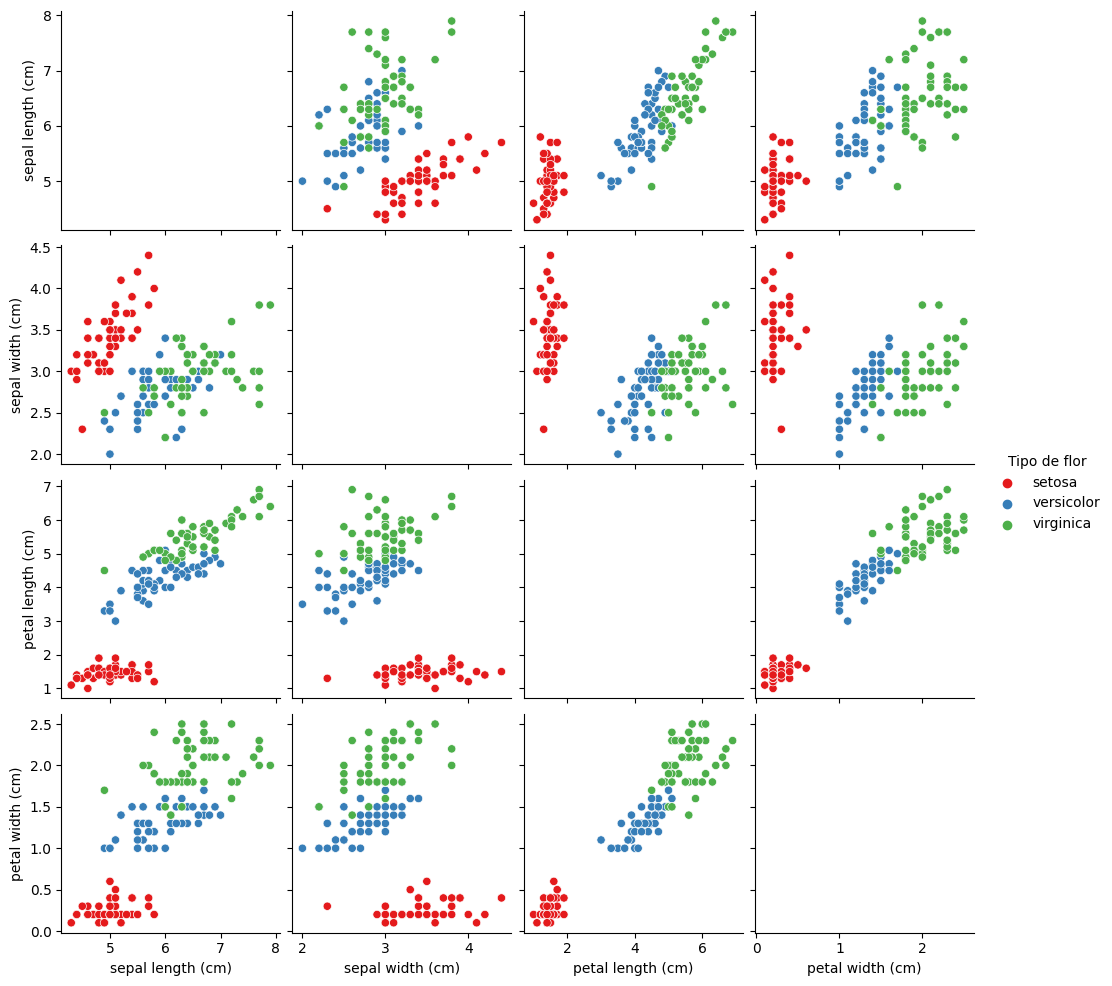

In [6]:
feature_names = iris.feature_names

# Creamos un DataFrame para facilitar la visualización
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Tipo de flor'] = y
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Tipo de flor'] = iris_df['Tipo de flor'].map(species_names)

# Generamos gráficas de dispersión para cada par de atributos
g = sns.pairplot(iris_df, hue='Tipo de flor', palette='Set1', diag_kind='None')

plt.show()


Debido a la relación observada entre cada par de variables dentro del dataset, se determina que el par más adecuado para la clasificación es el de "petal length" (longitud del pétalo) con "petal width" (anchura del pétalo). Esta selección se basa en varias consideraciones: la combinación de "petal length" y "petal width" muestra una distinción más notoria entre las tres clases de flores (setosa, versicolor y virginica) en comparación con otros pares de variables, lo que significa que estas dos características tienen la capacidad de separar eficazmente las diferentes clases de flores en el espacio de características. 

Además, al observar los valores de las características dentro de cada clase, se nota que "petal length" y "petal width" exhiben patrones de comportamiento más similares dentro de una misma clase, lo que los hace más consistentes y distintivos para cada tipo de flor

In [7]:
#cogemos petal length y petal width
X = iris.data[:,(2,3)]  # Tomamos los dos atributos con mayor relevancia para la clasificación



#Cojemos solo las plantas de tipo setosa y virginica
X = X[(y == 0) | (y == 2)]
y = y[(y == 0) | (y == 2)]



#X = iris.data[:,(2,3)]  # Tomamos los dos atributos con mayor relevancia para la clasificación
#Convertir las etiquetas de las clases a 0 y 1
y = np.where(y == 0, 0, 1)


#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Definir los hiperparámetros para el grid search
learning_rates = [0.01, 0.1, 0.5]
thresholds = [0.01, 0.2, 0.75]

results_list = []

# Crear gridsearch y recoger historial
#El for muestre 1 valor mas y no pare cuando accuracy es 1

for lr in learning_rates:
    for th in thresholds:
        perceptron = Perceptron(learning_rate=lr, threshold=th)
        perceptron.fit(X_train, y_train)
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # Agregar los resultados a la lista
        results_list.append({
            'Learning Rate': lr,
            'Threshold': th,
            'Accuracy': accuracy,
            'History': perceptron.history
        })

# Convertir la lista de resultados en un DataFrame
results = pd.DataFrame(results_list)



# Entrenamos el perceptrón
perceptron = Perceptron(learning_rate=0.01, threshold=0.01) 
perceptron.fit(X_train, y_train)

#comprobar si tiene overfitting
y_pred_train = perceptron.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = perceptron.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy en entrenamiento: {accuracy_train:.2f}')
print(f'Accuracy en prueba: {accuracy_test:.2f}')

# Mostrar los resultados en una tabla con import tabulate y solucionar el problema de que no se muestra toda la tabla
for idx, row in results.iterrows():
    print(f'\nResultados para Learning Rate: {row["Learning Rate"]} y Threshold: {row["Threshold"]}')
    print(f'Accuracy: {row["Accuracy"]:.2f}')
    print('Historial de actualización de pesos:')
    for epoch in row['History']:
        print(f'\nÉpoca: {epoch["Epoch"]}, Accuracy: {epoch["Accuracy"]:.2f}')
        for update in epoch['Updates']:
            print(f'Entradas: {update["Inputs"]}, Salida deseada: {update["Desired output"]}, Salida actual: {update["Actual output"]}, Error: {update["Error"]}, Pesos iniciales: {update["Initial weights"]}, Pesos finales: {update["Final weights"]}')



Accuracy en entrenamiento: 1.00
Accuracy en prueba: 1.00

Resultados para Learning Rate: 0.01 y Threshold: 0.01
Accuracy: 1.00
Historial de actualización de pesos:

Época: 1, Accuracy: 0.53
Entradas: [6.6, 2.1], Salida deseada: 1, Salida actual: 1, Error: 0, Pesos iniciales: [0.2460506077543536, 0.6536506813898054], Pesos finales: [0.2460506077543536, 0.6536506813898054]
Entradas: [4.8, 1.8], Salida deseada: 1, Salida actual: 1, Error: 0, Pesos iniciales: [0.2460506077543536, 0.6536506813898054], Pesos finales: [0.2460506077543536, 0.6536506813898054]
Entradas: [1.6, 0.4], Salida deseada: 0, Salida actual: 1, Error: -1, Pesos iniciales: [0.2300506077543536, 0.6496506813898054], Pesos finales: [0.21405060775435358, 0.6456506813898054]
Entradas: [1.3, 0.2], Salida deseada: 0, Salida actual: 1, Error: -1, Pesos iniciales: [0.21705060775435359, 0.6476506813898054], Pesos finales: [0.20405060775435357, 0.6456506813898054]
Entradas: [5.0, 1.5], Salida deseada: 1, Salida actual: 1, Error: 0, 

## Cuestión 2

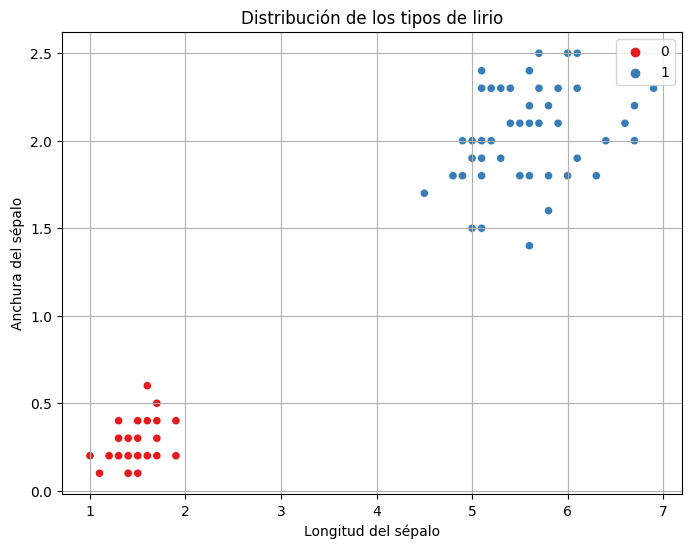

In [9]:
# Graficamos la distribución de los tipos de lirio
plot_iris_data(X, y)

In [10]:
print("Pesos del perceptrón:", perceptron.weights)
print("Umbral del perceptrón:", perceptron.bias)

Pesos del perceptrón: [-0.09102345  0.48499525]
Umbral del perceptrón: -0.15


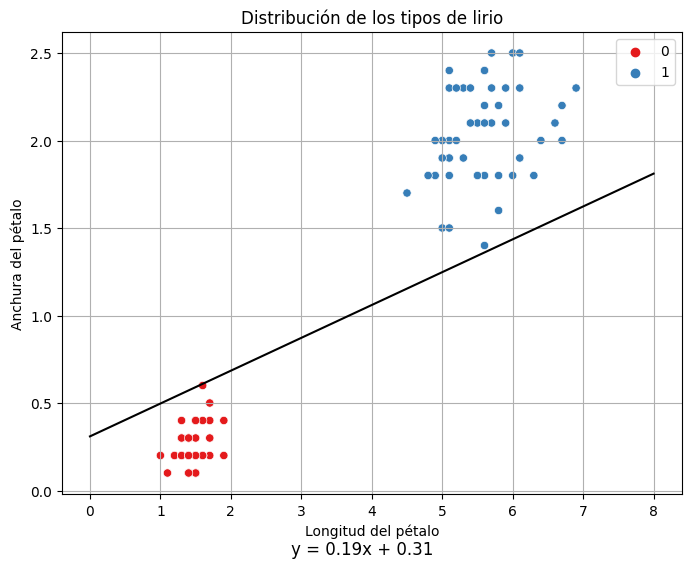

In [11]:
# Graficamos el hiperplano resultante
plot_hyperplane(X, y, perceptron.weights, perceptron.bias)

## Cuestión 3

In [12]:
#cogemos petal length,petal width y sepal length
x3 = iris.data[:,(2,3,0)]
y3 = iris.target

#Cogemos 4 atributos
x4 = iris.data[:,(0,1,2,3)]  # Tomamos los dos atributos con mayor relevancia para la clasificación
y4 = iris.target

#PAsamos las etiquetas de las clases a 0 y 1
y3 = np.where(y3 == 0, 0, 1)
y4 = np.where(y4 == 0, 0, 1)


#Cogemos solo virgínica y setosa para 3
x3 = x3[(y3 == 0) | (y3 == 2)]
y3 = y3[(y3 == 0) | (y3 == 2)]

#Cogemos solo setosa y virginica para 4
x4 = x4[(y4 == 0) | (y4 == 2)]
y4 = y4[(y4 == 0) | (y4 == 2)]



#Dividir el conjunto de datos en entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.2, random_state=42)


#Entrenamos el perceptrón
perceptron3 = Perceptron(learning_rate=0.01, threshold=0.01)
perceptron3.fit(X_train3, y_train3)
perceptron4 = Perceptron(learning_rate=0.01, threshold=0.01)
perceptron4.fit(X_train4, y_train4)

#Accuary con3 y 4 atributos
y_pred_train3 = perceptron3.predict(X_train3)
accuracy_train3 = accuracy_score(y_train3, y_pred_train3)
y_pred_test3 = perceptron3.predict(X_test3)
accuracy_test3 = accuracy_score(y_test3, y_pred_test3)
y_pred_train4 = perceptron4.predict(X_train4)
accuracy_train4 = accuracy_score(y_train4, y_pred_train4)
y_pred_test4 = perceptron4.predict(X_test4)
accuracy_test4 = accuracy_score(y_test4, y_pred_test4)

print(f'Accuracy en entrenamiento con 3 atributos: {accuracy_train3:.2f}')
print(f'Accuracy en prueba con 3 atributos: {accuracy_test3:.2f}')
print(f'Accuracy en entrenamiento con 4 atributos: {accuracy_train4:.2f}')
print(f'Accuracy en prueba con 4 atributos: {accuracy_test4:.2f}')

#Imprimimos los pesos y el umbral del perceptrón
print("Pesos del perceptrón con 3 atributos:", perceptron3.weights)
print("Umbral del perceptrón con 3 atributos:", perceptron3.bias)
print("Pesos del perceptrón con 4 atributos:", perceptron4.weights)
print("Umbral del perceptrón con 4 atributos:", perceptron4.bias)


Accuracy en entrenamiento con 3 atributos: 1.00
Accuracy en prueba con 3 atributos: 1.00
Accuracy en entrenamiento con 4 atributos: 1.00
Accuracy en prueba con 4 atributos: 1.00
Pesos del perceptrón con 3 atributos: [ 0.4399619   0.20069775 -0.18170425]
Umbral del perceptrón con 3 atributos: -0.13999999999999999
Pesos del perceptrón con 4 atributos: [ 0.16859826 -0.4189935   0.11675382  0.21111059]
Umbral del perceptrón con 4 atributos: -0.15


In [14]:


#Entrenar el perceptrón con los datos de entrenamiento
perceptron = Perceptron(learning_rate=0.01, threshold=0.01)
perceptron.fit(X_train, y_train)

#Predecir las etiquetas de las clases para los datos de prueba
y_pred = perceptron.predict(X_test)

#Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Mostrar la matriz de confusión
print("Matriz de confusión:")
print(cm)




Matriz de confusión:
[[12  0]
 [ 0  8]]
